# Smoke detection project

It is estimated that if every home had working smoke alarms, U.S. residential fire deaths could drop by 36%, with nearly 1100 lives saved per year. The number of false fire alarms is increasing continuously, which is a severe issue for firefighters.

## Data description

All credit regarding the data and relevant information about the problem goes to [Stefan Blattmann](https://github.com/Blatts01) through his [original project](https://www.hackster.io/stefanblattmann/real-time-smoke-detection-with-ai-based-sensor-fusion-1086e6).

Data was colected via a series of sensors, across different controled scenarios:

* Normal indoor
* Normal outdoor
* Indoor wood fire, firefighter training area
* Indoor gas fire, firefighter training area
* Outdoor wood, coal, and gas grill
* Outdoor high humidity
* etc.

The following metrics correspond to one or more columns on the data set:

* UTC: Timestamp UTC seconds
* Air Temperature (Celsius)
* Air Humidity
* TVOC: Total Volatile Organic Compounds; measured in parts per billion [(Source)](https://en.wikipedia.org/wiki/Volatile_organic_compound)
* eCO2: CO2 equivalent concentration; calculated from different values like TVCO
* Raw H2: raw molecular hydrogen; not compensated (Bias, temperature, etc.) [(Source)](https://en.wikipedia.org/wiki/Hydrogen)
* Raw Ethanol: raw ethanol gas [(Source)](https://en.wikipedia.org/wiki/Ethanol)
* Air Pressure
* PM 1.0 and PM 2.5: particulate matter size < 1.0 µm (PM1.0). 1.0 µm < 2.5 µm (PM2.5)
* NC0.5/NC1.0 and NC2.5: Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air. The raw NC is also classified by the particle size: < 0.5 µm (NC0.5); 0.5 µm < 1.0 µm (NC1.0); 1.0 µm < 2.5 µm (NC2.5);
* CNT: Sample counter
* Fire Alarm: ground truth is "1" if a fire is there

Source: https://www.hackster.io/stefanblattmann/real-time-smoke-detection-with-ai-based-sensor-fusion-1086e6

## Import data

In [1]:
# Import libraries
import pandas as pd

df = pd.read_csv('smoke_detection_iot.csv', index_col=0)

# Check number of rows and columns and compare to dataset from terminal
print(df.shape)

(62630, 15)


The use of spaces, brackets and the percentage symbol in column names can cause difficulties when analyzing data. Thus, we will change these names.

In [2]:
# Check col names
print('Old names:')
print(df.columns)

# Rename columns
df.rename(columns = {'Temperature[C]': 'temperature_C',
                     'Humidity[%]': 'humidity', 
                     'TVOC[ppb]': 'TVOC_ppb',
                     'eCO2[ppm]': 'CO2_ppm', 
                     'Raw H2': 'raw_H2', 
                     'Raw Ethanol': 'raw_ethanol', 
                     'Pressure[hPa]': 'pressure_hPA', 
                     'Fire Alarm': 'fire'},
          inplace = True)

print('New names:')
print(df.columns)

Old names:
Index(['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')
New names:
Index(['UTC', 'temperature_C', 'humidity', 'TVOC_ppb', 'CO2_ppm', 'raw_H2',
       'raw_ethanol', 'pressure_hPA', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'CNT', 'fire'],
      dtype='object')


In [3]:
# Checking if all columns are numeric
df.dtypes

UTC                int64
temperature_C    float64
humidity         float64
TVOC_ppb           int64
CO2_ppm            int64
raw_H2             int64
raw_ethanol        int64
pressure_hPA     float64
PM1.0            float64
PM2.5            float64
NC0.5            float64
NC1.0            float64
NC2.5            float64
CNT                int64
fire               int64
dtype: object

In [4]:
# This gives an overview of the data, summarizing each column to obtain important statistics.
print(df.describe())

                UTC  temperature_C      humidity      TVOC_ppb       CO2_ppm  \
count  6.263000e+04   62630.000000  62630.000000  62630.000000  62630.000000   
mean   1.654792e+09      15.970424     48.539499   1942.057528    670.021044   
std    1.100025e+05      14.359576      8.865367   7811.589055   1905.885439   
min    1.654712e+09     -22.010000     10.740000      0.000000    400.000000   
25%    1.654743e+09      10.994250     47.530000    130.000000    400.000000   
50%    1.654762e+09      20.130000     50.150000    981.000000    400.000000   
75%    1.654778e+09      25.409500     53.240000   1189.000000    438.000000   
max    1.655130e+09      59.930000     75.200000  60000.000000  60000.000000   

             raw_H2   raw_ethanol  pressure_hPA         PM1.0         PM2.5  \
count  62630.000000  62630.000000  62630.000000  62630.000000  62630.000000   
mean   12942.453936  19754.257912    938.627649    100.594309    184.467770   
std      272.464305    609.513156      1.3

In [5]:
# Taking a look at the data
df.head()

,UTC,temperature_C,humidity,TVOC_ppb,CO2_ppm,raw_H2,raw_ethanol,pressure_hPA,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,fire
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [6]:
df.tail()

,UTC,temperature_C,humidity,TVOC_ppb,CO2_ppm,raw_H2,raw_ethanol,pressure_hPA,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,fire
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0
62629,1655130051,19.299,16.52,643,400,13696,20543,936.676,0.57,0.59,3.90,0.607,0.014,5743,0


This data set, in particular, has no missing data nor strange values (such as a character in a numeric column). However, this is not a common situation. Most of the time, data is very messy and needs to be taken care of.

In [7]:
# Null x non-null
df.isnull().sum()
# There is no missing data

UTC              0
temperature_C    0
humidity         0
TVOC_ppb         0
CO2_ppm          0
raw_H2           0
raw_ethanol      0
pressure_hPA     0
PM1.0            0
PM2.5            0
NC0.5            0
NC1.0            0
NC2.5            0
CNT              0
fire             0
dtype: int64

In [8]:
# Checking if the target is balanced. The number of positives is a lot larger than the negatives.
df['fire'].value_counts()

1    44757
0    17873
Name: fire, dtype: int64

In [9]:
# See how the attributes' means differ from fire to non-fire

df.groupby('fire').mean()

,UTC,temperature_C,humidity,TVOC_ppb,CO2_ppm,raw_H2,raw_ethanol,pressure_hPA,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
fire,,,,,,,,,,,,,,
0,1.654860e+09,19.694803,42.930077,4596.587255,962.587255,12896.316847,20082.823533,938.101383,261.982706,450.034639,1356.283816,493.872027,178.982259,2410.608851
1,1.654765e+09,14.483152,50.779534,882.013071,553.189356,12960.878053,19623.050428,938.837806,36.146406,78.417842,146.111337,87.665549,40.541627,13746.303439


## Visualizations

The use of visualization can provide a great understanding of the features and their relationship with the target in a data set.

### Correlation between variables

First, we will check the correlation between all variables in the data set.

For this, we will implement three methods available on Pandas' ```corr``` function:

* Pearson: the most widely used correlation statistic to measure the degree of the relationship between *linearly* related variables.

* Kendall: the Kendall rank correlation coefficient is a statistic used to measure the ordinal association between two measured quantities. It can be used on continuous and ordinal data. A τ test is a non-parametric hypothesis test for statistical dependence based on the τ coefficient.

* Spearman: Spearman's rank corelation is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables). It is nonparametric, thus it does not rely on normality, and also works with ordinal variables. It assesses how well the relationship between two variables can be described using a monotonic function.

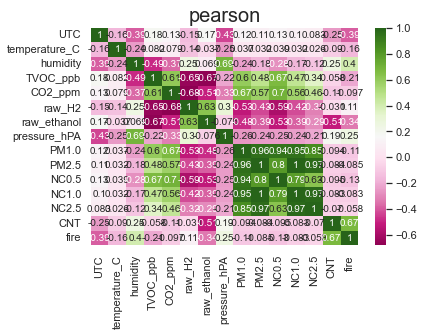

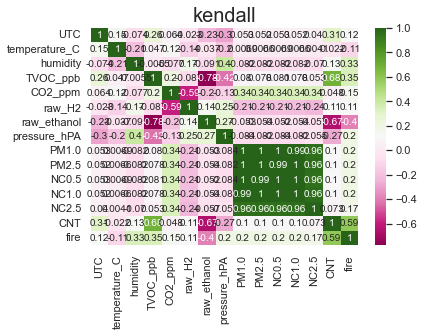

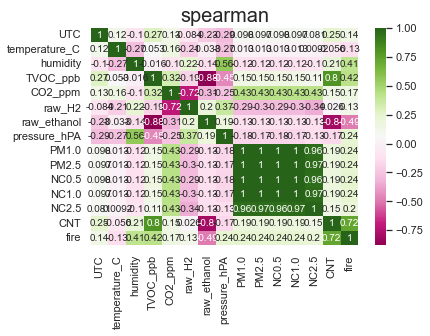

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define plot size
plt.rcParams["figure.figsize"]=20,20

# Correlation heatmap
sns.set(rc={'figure.figsize':(11.7,8.27)})

for i in ['pearson', 'kendall', 'spearman']:
    plt.figure()
    sns.heatmap(df.corr(method = i), annot = True, cmap="PiYG").set_title(i, fontsize = 20)

Looking at the heatmaps, the most correlated (cor greater than | 0.8|) attributes seem to be: TVOC with raw ethanol and CNT; CO2 with raw H2; raw ethanol with CNT; and all PMs and NCs with each other.

Next, we will plot these attributes to observe how they relate to one another.

<AxesSubplot: xlabel='raw_ethanol', ylabel='CNT'>

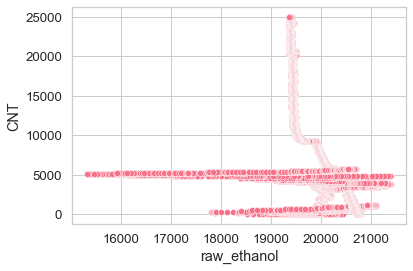

In [11]:
sns.set_theme(style="whitegrid", palette="husl", font_scale=1.2)

sns.scatterplot(data = df, x = 'raw_ethanol', y = 'CNT')

<AxesSubplot: xlabel='CO2_ppm', ylabel='raw_H2'>

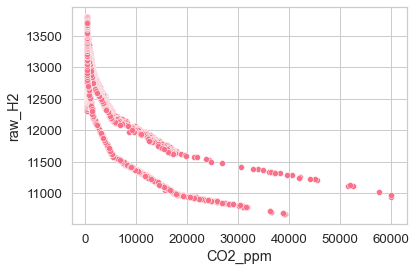

In [12]:
sns.scatterplot(data = df, x = 'CO2_ppm', y = 'raw_H2')

<AxesSubplot: xlabel='TVOC_ppb', ylabel='CNT'>

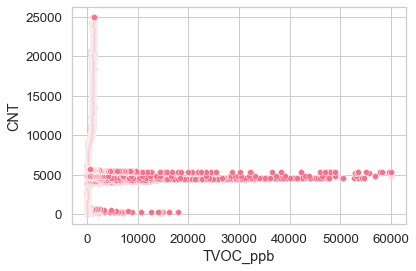

In [13]:
sns.scatterplot(data = df, x = 'TVOC_ppb', y = 'CNT')

<AxesSubplot: xlabel='TVOC_ppb', ylabel='raw_ethanol'>

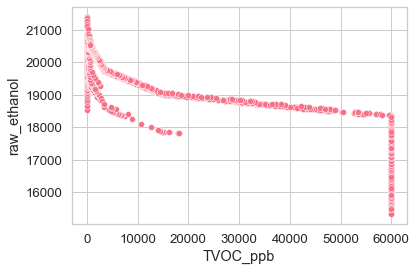

In [14]:
sns.scatterplot(data = df, x = 'TVOC_ppb', y = 'raw_ethanol')

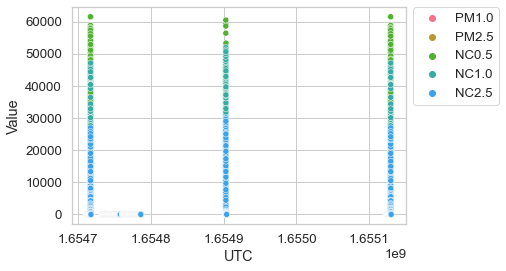

In [15]:
df2 = pd.melt(df[['UTC','PM1.0','PM2.5','NC0.5','NC1.0','NC2.5']], 'UTC', var_name='Measure', 
              value_name='Value')

sns.scatterplot(x = 'UTC', y = 'Value', hue='Measure', data=df2)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Make a dispersion plot matrix

[Text(0, 0, '17873'), Text(0, 0, '44757')]

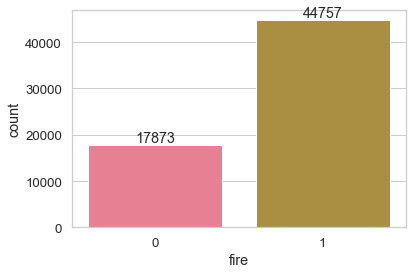

In [16]:
cp = sns.countplot(data = df, x = 'fire')

cp.bar_label(cp.containers[0])

The plot bellow indicates that data collection was probably performed for short periods in different days, and thus the points are concentrated and we see only a few on the plot. Next, we will convert the UTC series to datetime, which may help us visualize bettter this attribute.

<AxesSubplot: xlabel='UTC', ylabel='fire'>

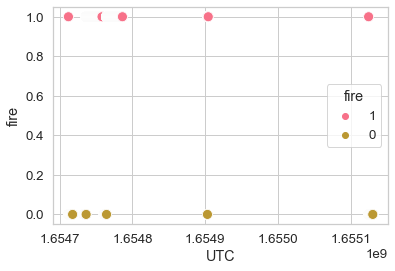

In [17]:
sns.scatterplot(data = df, x = 'UTC', y = 'fire', hue = 'fire', hue_order = [1,0], s=100)

# This plot indicates that data collection was probably performed in different days, and thus
# the UTC series contains wide gaps

## Working with time series

In our data, we have time represented by Unix time (also known as Epoch time or Posix time), which corresponds to the number of seconds that have elapsed since the Unix epoch, 00:00:00 UTC (Coordinated Universal Time) on 1st January 1970. 

Although this is a standardised measure of time, it is not very intuitive for humans to interpret. Thus, we will extract other information (such as dates and hours). Since we can not be sure of the time zone in which data was collected, we will extract the information in local time, keeping in mind it is not the actual time when the data was collected.

In [18]:
# We will convert UTC time to datetime to make data more comprehensible 

from datetime import datetime
df['datetime'] = pd.to_datetime(df['UTC'],unit='s')
df['day'] = pd.to_datetime(df['UTC'],unit='s').dt.day
df['time'] = pd.to_datetime(df['UTC'],unit='s').dt.hour

print(df[['UTC','datetime','day','time']].head)

<bound method NDFrame.head of               UTC            datetime  day  time
0      1654733331 2022-06-09 00:08:51    9     0
1      1654733332 2022-06-09 00:08:52    9     0
2      1654733333 2022-06-09 00:08:53    9     0
3      1654733334 2022-06-09 00:08:54    9     0
4      1654733335 2022-06-09 00:08:55    9     0
...           ...                 ...  ...   ...
62625  1655130047 2022-06-13 14:20:47   13    14
62626  1655130048 2022-06-13 14:20:48   13    14
62627  1655130049 2022-06-13 14:20:49   13    14
62628  1655130050 2022-06-13 14:20:50   13    14
62629  1655130051 2022-06-13 14:20:51   13    14

[62630 rows x 4 columns]>


If we plot the day and time of the events, we can see more points. If we plotted the hours x seconds of the day for each day separatedly we would be able to see even more details. For now, we can conclude that data collection was performed on different moments of the day each time, which could interfere on the results, since different times of the day presents different umidities, temperatures, and so on. A better research outline would systematically account for these factors.

<AxesSubplot: xlabel='day', ylabel='time'>

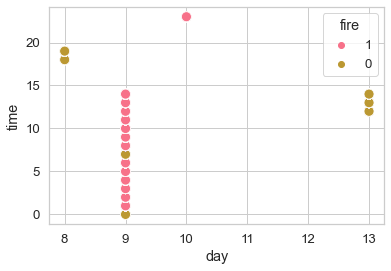

In [19]:
sns.scatterplot(data = df, x = 'day', y = 'time', hue='fire', hue_order = [1,0], s=100)

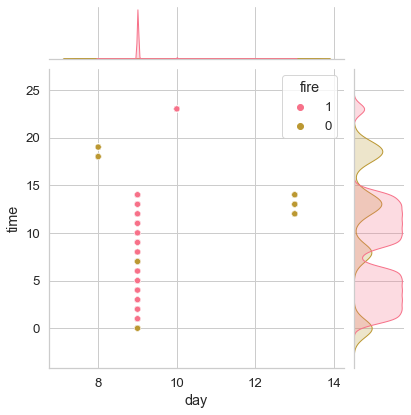

In [20]:
sns.jointplot(data = df, x = 'day', y = 'time', hue='fire', hue_order = [1,0])

If we group our data set by day and time, we can see how the mean for each attribute and the target varies.

In [21]:
df.groupby(['day','time']).mean()

UTC  temperature_C   humidity      TVOC_ppb      CO2_ppm  \
day time                                                                      
8   18    1.654713e+09      27.625473  43.949005     94.918102   412.659013   
    19    1.654716e+09      38.921999  33.255430  12999.002555  1981.949537   
9   0     1.654735e+09      22.320940  51.752760     36.133594   400.872597   
    1     1.654738e+09      -3.988094  52.249072    119.336667   400.000000   
    2     1.654742e+09      -4.504414  54.513458    428.587778   495.015556   
    3     1.654745e+09      14.003174  50.574719   1056.562222   592.534722   
    4     1.654749e+09      13.897088  50.313992   1138.905278   432.767222   
    5     1.654753e+09      16.404848  50.507506   1192.332778   405.618611   
    6     1.654756e+09     -13.155352  50.803953   1338.445833   406.406389   
    7     1.654760e+09      12.093247  51.746168    742.469072   411.847079   
    8     1.654763e+09      17.639850  52.344689     79.678611   400.000000   
    9     1.654767e+09      20.659322  51.826942    121.618333   400.000000   
    10    1.654771e+09      21.602658  54.301778    586.586111   554.238889   
    11    1.654774e+09      25.703603  50.180353   1092.771667   551.057222   
    12    1.654778e+09      25.790847  50.397628   1144.190278   416.036389   
    13    1.654781e+09      25.736847  50.546706   1232.879167   406.011667   
    14    1.654785e+09      25.662251  50.845104   1337.831049   407.080332   
10  23    1.654904e+09      34.233224  23.258588    589.825823  4327.589255   
13  12    1.655125e+09      18.853584  42.862231     59.343049   418.086323   
    13    1.655127e+09       6.725675  43.940850   1304.643611   418.587222   
    14    1.655129e+09      -4.510023  18.004257  28912.337859  4316.226038   

                raw_H2   raw_ethanol  pressure_hPA        PM1.0        PM2.5  \
day time                                                                       
8   18    12797.044776  20646.237275    937.455305     1.967107     2.043739   
    19    12847.517407  19748.136698    937.056948   745.291460  1281.883286   
9   0     13022.145976  19949.256435    939.698948     0.572164     0.618306   
    1     13211.277222  20113.553611    939.669329     1.884614     1.957989   
    2     13008.023056  19849.003333    939.342383     1.020975     1.060775   
    3     12817.462500  19466.141944    939.003912     2.094425     2.176058   
    4     12875.536667  19444.948333    938.817022     1.828808     1.900108   
    5     12928.893611  19430.884167    938.714431     1.769283     1.838136   
    6     12972.508889  19393.394444    938.729488     1.911550     1.985944   
    7     12794.824742  19486.938144    939.256564     1.111856     1.264175   
    8     13087.323611  19982.871389    939.686356     0.861461     0.897733   
    9     13204.476111  20122.062778    939.644466     1.616794     1.679706   
    10    12932.380556  19731.466667    939.238838     1.404108     1.458889   
    11    12831.992500  19456.870556    938.965336     2.017222     2.095794   
    12    12886.548333  19443.633611    938.774683     1.781931     1.851436   
    13    12939.838889  19420.358056    938.713097     1.822028     1.892931   
    14    12978.226650  19393.509723    938.746197     1.901310     1.975336   
10  23    12674.684575  20075.666378    930.979036  1336.664957  2973.733943   
13  12    12823.967489  20711.589686    937.547978     2.098868     2.180460   
    13    12890.514444  20516.020833    937.320572     1.669000     1.734072   
    14    12635.322684  18728.131789    936.780481  1861.635000  3203.457851   

                NC0.5        NC1.0        NC2.5           CNT      fire  
day time                                                                 
8   18      13.539150     2.111258     0.047682   1306.000000  0.000765  
    19    3854.299134  1406.909743   510.742916   4178.000000  0.000000  
9   0        3.881662     0.642599     0.036954   1534.000000  0

## Feature extraction and model training

We will compare two algoithms: logistic regression and decision tree.

Before building the models, we will choose which attributes should be included and check if they need pre-processing.

We saw previously that the attributes PM and NC are highly correlated. According to the description of the data set, we cannot be really sure what the PM attributes are, so it might be a good idea not to use them.

The hour of the day is probably an important feature to predict fire in the real world, since there is a higher chance of a domestic accident occuring during lunch or dinner hours. However, the data set we are using was created artificially, and thus this variable may not reflect real life.

Lastly, since our data set does not have a huge number of attributes, we will not be using any tools for feature selection, such as [Recursive Feature Elimination (RFE)](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In [22]:
# Removing extra columns from data set and separating train and test sets

from sklearn.model_selection import train_test_split

# Remove columns
cols_to_remove = ['UTC', 'datetime', 'day', 'time']
df_vars = df.drop(cols_to_remove, axis = 1)

# Separate attributes and target
X = df_vars.loc[:, df_vars.columns != 'fire']
y = df_vars.loc[:, df_vars.columns == 'fire']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Logistic regression

Logistic regression aims to solve classification problems. It does this by predicting categorical outcomes, unlike linear regression that predicts a continuous outcome.

First, we will fit a simple logistic regression model with all the attributes and take a few metrics to evaluate its performance.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import recall_score, f1_score, precision_score, roc_auc_score

logreg = LogisticRegression()
y_train = y_train.values.ravel()
# .values will give the values in a numpy array (shape: (n,1))
# .ravel will convert that array shape to (n, ) (i.e. flatten it)

# Train model
logreg.fit(X_train, y_train)

# Predict new data
predictions = logreg.predict(X_test)

# Quick evaluation of the model
score = logreg.score(X_test, y_test)
print('Accuracy:',score)

roc_auc = roc_auc_score(y_test, predictions)
print('ROC-AUC:',roc_auc)

ConfM = pd.DataFrame(
    metrics.confusion_matrix(y_test, predictions),
    columns = ['Predict Fire','Predict Not Fire'],
    index = ['True Fire','False Fire'])
print(ConfM)

Accuracy: 0.9759965937516633
ROC-AUC: 0.9762251003389474
            Predict Fire  Predict Not Fire
True Fire           5297               126
False Fire           325             13041


/Users/alanaselli/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The metrics obtained in this first model were actually pretty good. We will try to make it even better.

We received a convergence warning, suggesting us to increase the number of iterations or scale the data, which will be done in the next steps.

We saw earlier that the attributes PM1.0, PM2.5, NC0.5, NC1.0, and NC2.5 are highly correlated with each other. From these, we will only include NC2.5 in our model, which is the number of particles in the air with size 1.0 µm < 2.5 µm. We are assuming that in a scenario where we would build a new smoke detector, it would be easier to find an equipment that is able to detected larger particles.

In [24]:
# Reducing the number of attributes

X_train2 = X_train.drop(['PM1.0','PM2.5', 'NC1.0', 'NC0.5'], axis = 1)
X_test2 = X_test.drop(['PM1.0','PM2.5', 'NC1.0', 'NC0.5'], axis = 1)

logreg = LogisticRegression()
logreg.fit(X_train2, y_train)
predictions = logreg.predict(X_test2)

score = logreg.score(X_test2, y_test)
print('Accuracy:',score)

roc_auc = roc_auc_score(y_test, predictions)
print('ROC-AUC:',roc_auc)

ConfM = pd.DataFrame(
    metrics.confusion_matrix(y_test, predictions),
    columns = ['Predict Fire','Predict Not Fire'],
    index = ['True Fire','False Fire'])
print(ConfM)

Accuracy: 0.9883442439725372
ROC-AUC: 0.9908213237332504
            Predict Fire  Predict Not Fire
True Fire           5405                18
False Fire           201             13165


/Users/alanaselli/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We can see that removing the attributes 'PM1.0', 'PM2.5', 'NC1.0', and 'NC0.5' resulted in better accuracy and a higher ROC-AUC, thus improving the model. Next, we will apply feature scaling and see if we get better results.

### Feature scaling

Some Machine Learning algorithms require feature scaling. That could be for several reasons: linear/logistic regression and neural network, for example, use gradient descent as an optimization technique, and differences in ranges of features will cause different step sizes for each feature. Distance-based algorithms such as KNN, K-means, and SVM use distances between data points to determine their similarity. In this case, different scales may result in higher weightage given to features with higher magnitude. On the other hand, tree-based algorithms are fairly insensitive to the scale of the features, since they ae only splitting a node based on a single feature. In other words, this type of algorithm does not "mix" features.

**Standardization** is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation, and the values are not restricted to a particular range. Standardization can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Since standardization does not have a bounding range, even if you have outliers in your data, they will not be affected by standardization.

<center>$X' = \frac{X - \mu}{\sigma}$</center>

**Normalization** is another scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples. Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

<center>$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$</center>

In [25]:
# Normalizing the data

from sklearn import preprocessing

X_normalized = preprocessing.normalize(X_train2, norm='l2')
X_test_normalized = preprocessing.normalize(X_test2, norm='l2')

logreg = LogisticRegression()
logreg.fit(X_normalized, y_train)
predictions = logreg.predict(X_test_normalized)

score = logreg.score(X_test_normalized, y_test)
print('Accuracy:',score)

roc_auc = roc_auc_score(y_test, predictions)
print('ROC-AUC:',roc_auc)

ConfM = pd.DataFrame(
    metrics.confusion_matrix(y_test, predictions),
    columns = ['Predict Fire','Predict Not Fire'],
    index = ['True Fire','False Fire'])
print(ConfM)

Accuracy: 0.9555591037309064
ROC-AUC: 0.9550113516371337
            Predict Fire  Predict Not Fire
True Fire           5172               251
False Fire           584             12782


After normalizing the data, we got worse results. This may be because we did not check the distribution of each attribute, nor the existance of outliers.

In [26]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train2)
X_scaled = scaler.transform(X_train2)
X_test_scaled = scaler.transform(X_test2)

logreg = LogisticRegression()
logreg.fit(X_scaled, y_train)
predictions = logreg.predict(X_test_scaled)

score = logreg.score(X_test_scaled, y_test)
print('Accuracy:',score)

roc_auc = roc_auc_score(y_test, predictions)
print('ROC-AUC:',roc_auc)

ConfM = pd.DataFrame(
    metrics.confusion_matrix(y_test, predictions),
    columns = ['Predict Fire','Predict Not Fire'],
    index = ['True Fire','False Fire'])
print(ConfM)

Accuracy: 0.9908989302251318
ROC-AUC: 0.9882336013260228
            Predict Fire  Predict Not Fire
True Fire           5325                98
False Fire            73             13293


The accuracy increased, however the ROC-AUC decreased, even though both metrics are still very high. Each metric will be explained in the next section, but for now, we will continue without scaling the data.

### Model evaluation

Below is a summary of the most used metrics to evaluate Machine Learning classification models.

**Accuracy:** (TP + TN) / (TP + TN + FP + FN)

Accuracy is used to calculate the proportion of the total number of predictions that were correct. While being intuitive, the accuracy metric heavily relies on data specifics. If the dataset is imbalanced (the classes in a set are presented unevenly), the result won’t be something you can trust.

**Recall / Sensitivity / True Positive Rate:** TP / (TP + FN)

Recall is the probability that an actual positive will test positive. It is used in a case where it is critical to not miss the positives, even if it means increasing the number of false positives. For example: classification of sick versus healthy patients.

**Specificity / False Positive Rate:** TN / (TN + FP)

The fraction of all negative instances *incorrectly identified as positive*. Specificity is basically the opposite of recall.

**Precision:** TP / (TP + FP)

The fraction of positive predictions that are correct. Precision does well in cases when it is more important to *avoid False Positves* than False Negatives. A typical example of this is a spam detector model. It’s kind of okay if the model sends a couple of spam letters to the inbox, but sending an important non-spam email to the spam folder (False Positive) is much worse.

**F1 Score:** 2TP / (2TP + FP + FN)

The F1 Score tries to find the balance between precision and recall by calculating their harmonic mean. It is a measure of a test’s accuracy where the highest possible value is 1. This indicates perfect precision and recall.

**AUC-ROC:** The Receiver Operator Characteristic (ROC) is a probability curve that plots the TPR (True Positive Rate) against the FPR (False Positive Rate) at various threshold values. The Area Under the Curve (AUC) represents the degree or measure of separability. When AUC is equal to 1, the classifier is able to perfectly distinguish between all Positive and Negative class points. When AUC is equal to 0, the classifier would be predicting all Negatives as Positives and vice versa. When AUC is 0.5, the classifier is not able to distinguish between the Positive and Negative classes.

Let's check how well our model does considering each metric.

In [27]:
from sklearn.metrics import recall_score, f1_score, precision_score, roc_auc_score

logreg = LogisticRegression()
logreg.fit(X_train2, y_train)
predictions = logreg.predict(X_test2)

accuracy_lr = logreg.score(X_test2, y_test)
print('Accuracy:',accuracy_lr)

recall_lr = recall_score(y_test, predictions)
print('Recall:',recall_lr)

f1_lr = f1_score(y_test, predictions)
print('F1:',f1_lr)

precision_lr = precision_score(y_test, predictions)
print('Precision:',precision_lr)

roc_auc_lr = roc_auc_score(y_test, predictions)
print('ROC-AUC:',roc_auc_lr)

Accuracy: 0.9883442439725372
Recall: 0.9849618434834655
F1: 0.9917511017364119
Precision: 0.9986346051733292
ROC-AUC: 0.9908213237332504


/Users/alanaselli/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


It is crucial to choose the most appropriate metrics to evaluate a model, considering the given problem we are trying to solve. In our case, it is very important to not miss any true positives, and secondly, we should try to minimize the false positives since we don't want a fire alarm going off all the time. In this situation, the AUC-ROC is an excellent metric to use, while attributing a larger 'weight' on recall. Our logistic regression model achieved an AUC-ROC very close to 1, which is an almost perfect performance. Further ahead we should discuss some factors that contribute for this great performance.

Text(0.5, 1.0, 'ROC curve')

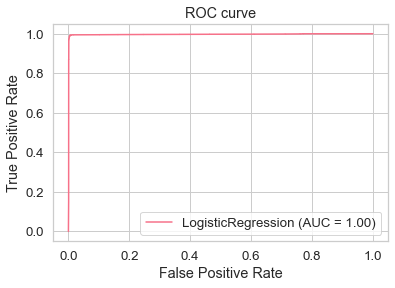

In [28]:
metrics.plot_roc_curve(logreg, X_test2, y_test)
plt.title("ROC curve")

### Decision Tree

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

A Decision Tree can be represented by a flowchart, where the decision nodes are conditions that split the data into branches, and each leaf-node contains a prediction. The root (first node) is at the top, while the leaf-nodes 'grow' towards the bottom.

The decision tree has many advantages: it is easy to interpret and is completely transparent, it does not usually require feature scaling, and can use both numeric and categorical features. On the other hand, decision tree models tend to overfit the data, and can become complex with the increasing number of layers and decision labels. The overfitting problem can be addressed by pruning the tree (adjusting parameters to limit the 'size' of the tree) or using the Random Forest algorithm, which combines the predictions of multiple decision trees. However, we will not use Random Forests in this project.

In [29]:
from sklearn import tree

# The parameter max_depth=3 will limit the size of the tree
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=3)
clf = clf.fit(X_train2, y_train)
pred = clf.predict(X_test2)

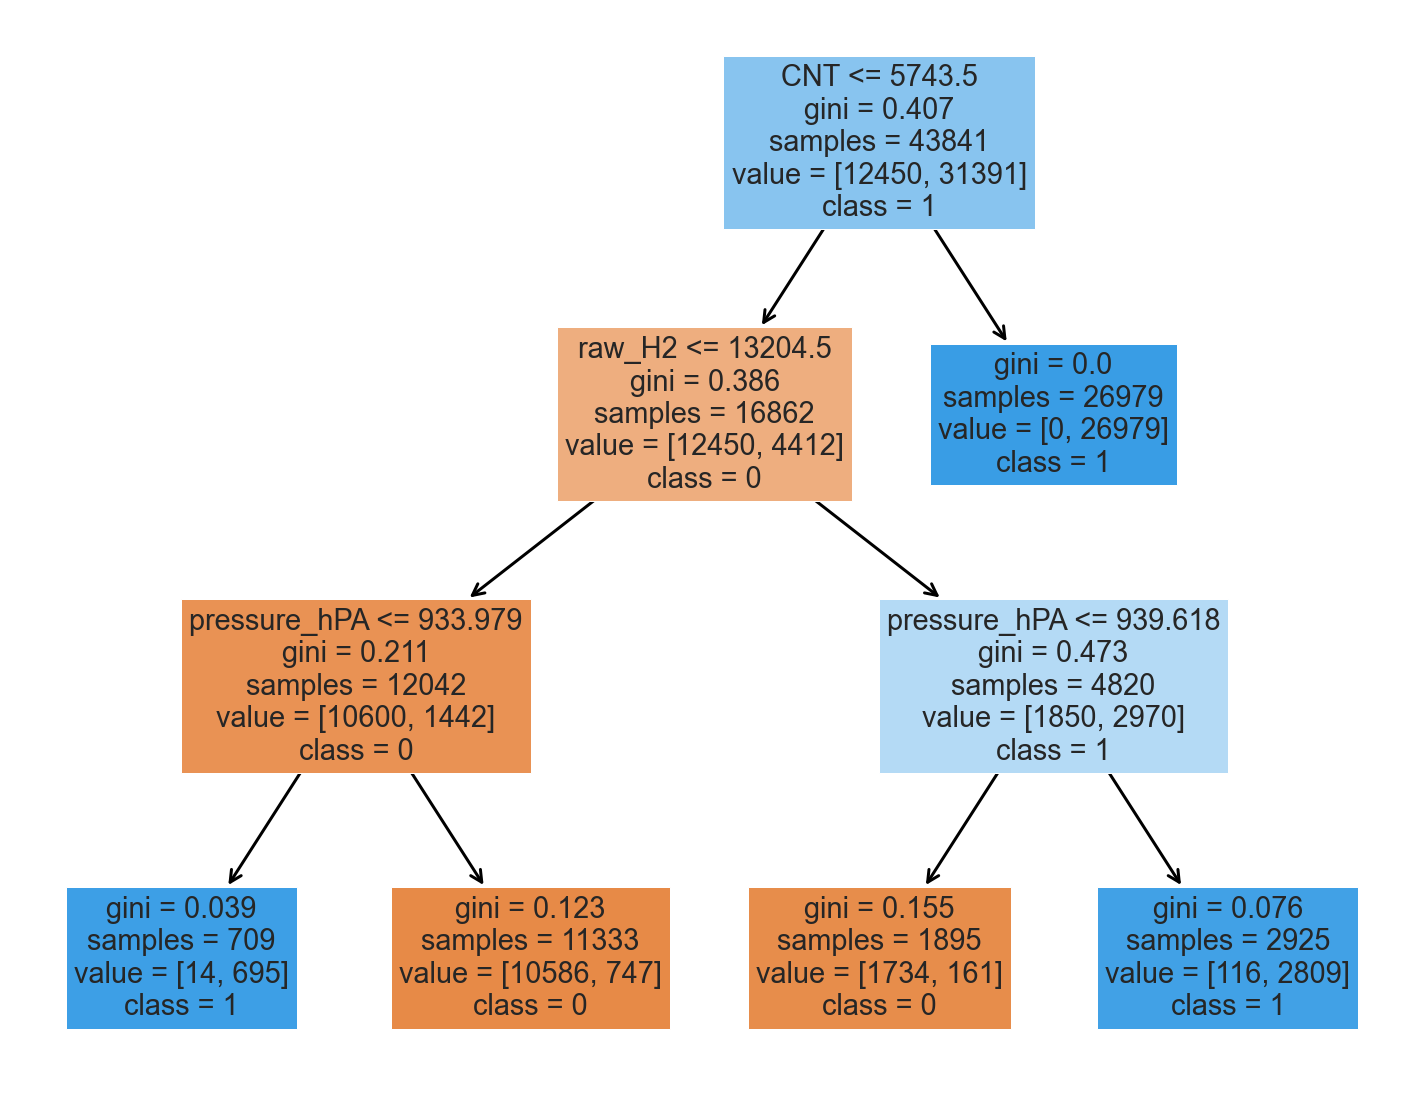

In [30]:
fig = plt.figure(figsize=(25,20))
out = tree.plot_tree(clf, 
               feature_names=X_train2.columns,  
               class_names=['0','1'],
               filled=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

In the image above we can see that the first attribute used to split the data is 'CNT', which results in a pure leaf-node (all samples are positive - gini = 0.0). It makes sense, since CNT has a significant correlation with the target. Next, the algorithm uses the attributes 'raw_H2' and 'pressure_hPA'. The resulting leaf-nodes are not pure, however they present a low gini index, which means that the probability of missclassification is low and there is a good segregation of the data. Taking a look at the root, we can see that `gini = 0.407` (the maximum would be 0.5), which indicates a good distribution of classes and therefore a good training set.

In [31]:
accuracy_dt = clf.score(X_test2, y_test)
print('Accuracy:',accuracy_dt)

recall_dt = recall_score(y_test, pred)
print('Recall:',recall_dt)

f1_dt = f1_score(y_test, pred)
print('F1:',f1_dt)

precision_dt = precision_score(y_test, pred)
print('Precision:',precision_dt)

roc_auc_dt = roc_auc_score(y_test, pred)
print('ROC-AUC:',roc_auc_dt)

ConfM = pd.DataFrame(
    metrics.confusion_matrix(y_test, predictions),
    columns = ['Predict Fire','Predict Not Fire'],
    index = ['True Fire','False Fire'])
print(ConfM)

Accuracy: 0.9756240353398264
Recall: 0.9708963040550651
F1: 0.9826593972436772
Precision: 0.9947110225356431
ROC-AUC: 0.9790863596616833
            Predict Fire  Predict Not Fire
True Fire           5405                18
False Fire           201             13165


The metrics of the DT model are worse than those of the logistic regression. Next, we will change the `max_depth` parameter and see if we get better results.

In [32]:
clf2 = tree.DecisionTreeClassifier(random_state=0, max_depth=5)
clf2 = clf2.fit(X_train2, y_train)
pred2 = clf2.predict(X_test2)

In [33]:
accuracy_dt = clf2.score(X_test2, y_test)
print('Accuracy:',accuracy_dt)

recall_dt = recall_score(y_test, pred2)
print('Recall:',recall_dt)

f1_dt = f1_score(y_test, pred2)
print('F1:',f1_dt)

precision_dt = precision_score(y_test, pred2)
print('Precision:',precision_dt)

roc_auc_dt = roc_auc_score(y_test, pred2)
print('ROC-AUC:',roc_auc_dt)

ConfM = pd.DataFrame(
    metrics.confusion_matrix(y_test, predictions),
    columns = ['Predict Fire','Predict Not Fire'],
    index = ['True Fire','False Fire'])
print(ConfM)

Accuracy: 0.9871201234765022
Recall: 0.9820439922190632
F1: 0.9908658564203215
Precision: 0.9998476538695917
ROC-AUC: 0.9908375963308115
            Predict Fire  Predict Not Fire
True Fire           5405                18
False Fire           201             13165


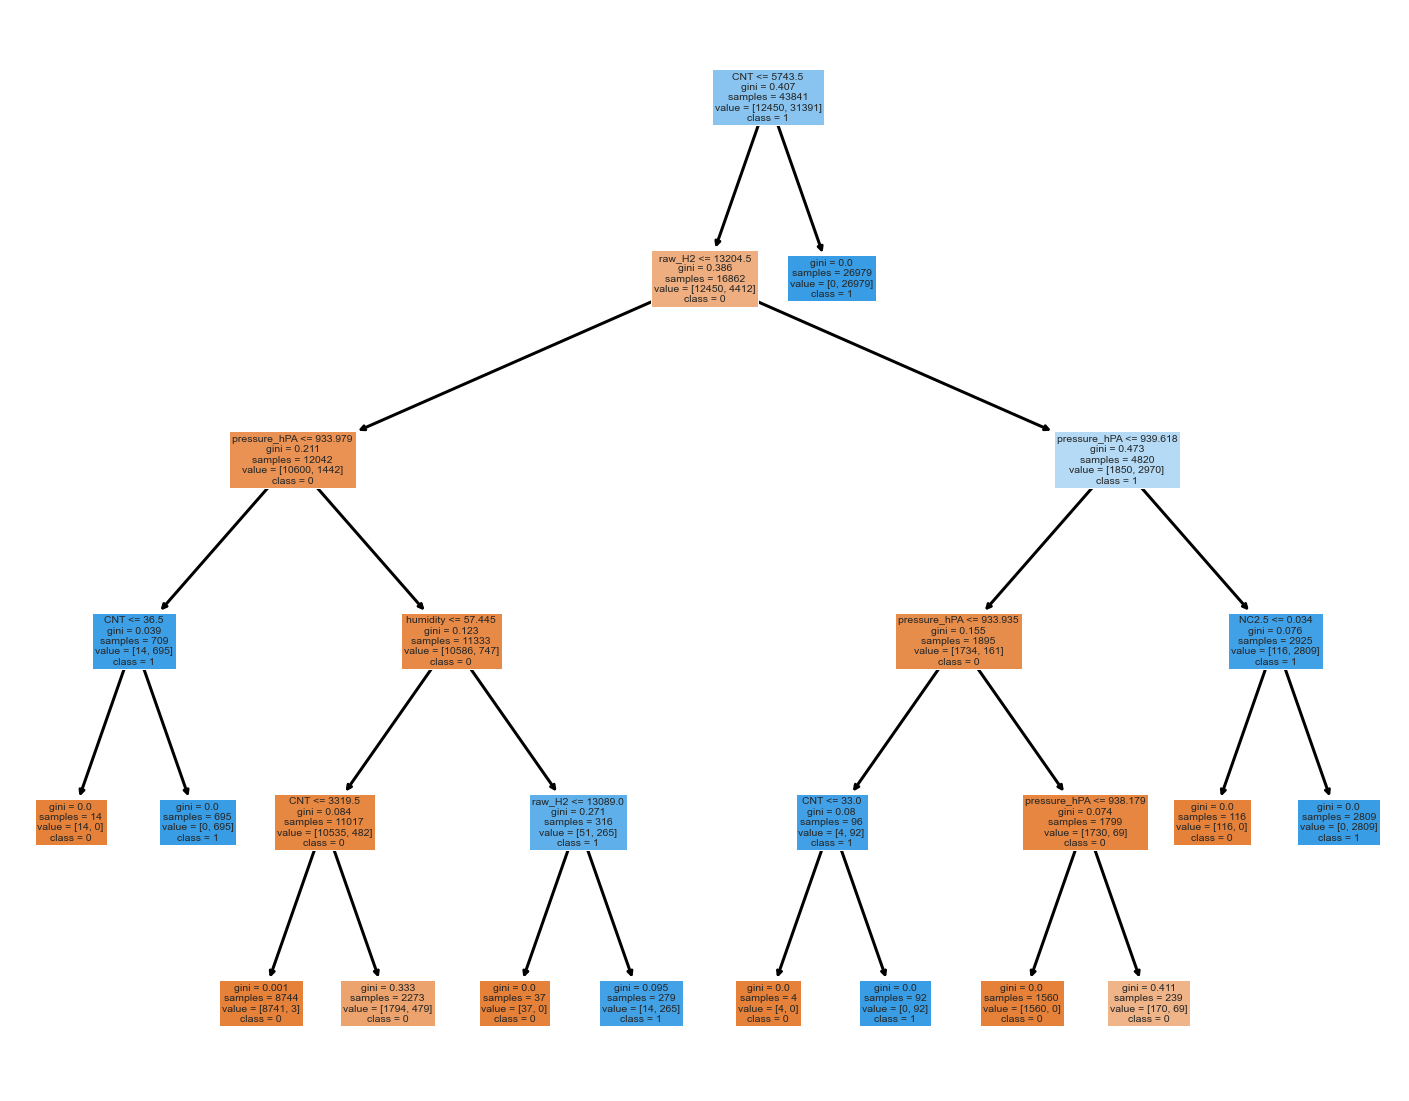

In [34]:
fig = plt.figure(figsize=(25,20))
out = tree.plot_tree(clf2, 
               feature_names=X_train2.columns,  
               class_names=['0','1'],
               filled=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

These last metrics were very similar to the logistic regression model's. However, we can see that the model increased in complexity. There are other changings we could do to try and get a better DT model, such as reducing the number of features. For now, we will comapare our final metrics and discuss them.

In [35]:
data = {'Accuracy': [accuracy_lr, accuracy_dt],
        'Recall': [recall_lr, recall_dt],
        'F1': [f1_lr, f1_dt],
        'Precision': [precision_lr, precision_dt],
        'ROC-AUC': [roc_auc_lr, roc_auc_dt]}

compare_models = pd.DataFrame(data=data, index=['Logistic Regression', 'Decision Tree'])
compare_models

,Accuracy,Recall,F1,Precision,ROC-AUC
Logistic Regression,0.988344,0.984962,0.991751,0.998635,0.990821
Decision Tree,0.987120,0.982044,0.990866,0.999848,0.990838


All of the metrics obtained for each of the final models are excelent. However, we can notice where each of them are slightly better:

- Logistic Regression has a higher accuracy, recall, and F1.
- Decision Tree has higher precision and ROC-AUC.

Even though we would prefer to avoid false positives, our main goal is to detect fire early enough so we can avoid a greater catastrophe. Thus, the main metric we should focus on is Recall, which is the probability that an actual positive will test positive. F1 and ROC-AUC are also interesting metrics, since they measure the 'balance' between recall and precision, however recall should have a larger 'weight' in the decision.

Furthermore, Logistic Regression is a statistical model that has been around since the nineteen century (according to Wikipedia). In a situation involving people's safety, where there are certain procedures to register a system like a fire alarm detector, the logistic regression presents as a more robust model than Decision Trees, that is based on decision rules. 

# References
 
Agrawal, Sumeet Kumar. **Metrics to Evaluate your Classification Model to take the right decisions.** July 20, 2021. [Link](https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/)

Bhandari, Aniruddha. **Feature Scaling for Machine Learning: Understanding the Difference Between Normalization vs. Standardization.** June 15, 2022. [Link](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)

Coordinated Universal Time. **Wikipedia.** [Link](https://en.wikipedia.org/wiki/Coordinated_Universal_Time)

Decision Trees. **SciKit-learn documentation.** [Link](https://scikit-learn.org/stable/modules/tree.html)

Decision tree learning. **Wikipedia**. [Link](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity)

Navlani, Avinash. **Decision Tree Classification in Python Tutorial.** Dec, 2018. [Link](https://www.datacamp.com/tutorial/decision-tree-classification-python)

LaTeX:Symbols. **AoPSOnline**. [Link](https://artofproblemsolving.com/wiki/index.php/LaTeX:Symbols)

Li, Susan. **Building A Logistic Regression in Python, Step by Step.** Sep 29, 2017. [Link](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8)

Logistic Regression. **Wikipedia**. [Link](https://en.wikipedia.org/wiki/Logistic_regression#History)

Machine Learning Metrics: How to Measure the Performance of a Machine Learning Model. **Altexsoft.** 16 Jun, 2022. [Link](https://www.altexsoft.com/blog/machine-learning-metrics/)

Narkhede, Sarang. **Understanding AUC - ROC Curve.** Jun 26, 2018. [Link](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

pandas.DataFrame.corr. **Pandas documentation.** [Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

Preprocessing data. **SciKit-learn documentation.** [Link](https://scikit-learn.org/stable/modules/preprocessing.html#normalization)

Scikit-Learn: Decision Tree Learning I - Entropy, Gini, and Information Gain. **BogoToBogo**. [Link](https://www.bogotobogo.com/python/scikit-learn/scikt_machine_learning_Decision_Tree_Learning_Informatioin_Gain_IG_Impurity_Entropy_Gini_Classification_Error.php)

Shukla, Abhay. **Writing Math Equations in Jupyter Notebook: A Naive Introduction.** Mar 26, 2020. [Link](https://medium.com/analytics-vidhya/writing-math-equations-in-jupyter-notebook-a-naive-introduction-a5ce87b9a214)

Unix time. **Wikipedia.** [Link](https://en.wikipedia.org/wiki/Unix_time)